In [1]:
import os
from fnmatch import fnmatch
from trainData_featExt_glcm import trainData_featExt_glcm
from trainData_featExt_gabor import trainData_featExt_gabor
import numpy as np
from PIL import Image
from filtering.filters import Median
from feature_extraction.lbp import Lbp
from sklearn.neighbors import NearestNeighbors
import sklearn
import time
from sklearn.metrics.pairwise import euclidean_distances
from sklearn import preprocessing

In [2]:
#Read features of training samples
train_samples_feats_matrix_glcm = np.load("train_samples_feats_matrix_GLCM.npy")

In [3]:
#Load features of validation samples 
train_samples_feats_matrix_gabor = np.load("train_samples_feats_matrix_Gabor.npy")

In [4]:
#Read features of training samples
valid_samples_feats_matrix_glcm = np.load("valid_samples_feats_matrix_GLCM.npy")

In [5]:
#Read features of training samples
valid_samples_feats_matrix_gabor = np.load("valid_samples_feats_matrix_Gabor.npy")

In [6]:
#concatenating features 
train_samples_feats_matrix_glcm_gabor = np.concatenate((train_samples_feats_matrix_glcm,train_samples_feats_matrix_gabor), axis=1)
valid_samples_feats_matrix_glcm_gabor = np.concatenate((valid_samples_feats_matrix_glcm,valid_samples_feats_matrix_gabor), axis=1)

In [23]:
#Train a KNN model from training data
t0 = time.time()
knn_model = NearestNeighbors(100, algorithm = 'kd_tree', metric ='euclidean')
knn_model.fit(train_samples_feats_matrix_glcm_gabor) 
print("traing time: ", time.time() - t0)

('traing time: ', 0.05939078330993652)


In [24]:
kth_dist, kth_ind = knn_model.kneighbors(valid_samples_feats_matrix_glcm_gabor)
kth_nearest_ind = kth_ind[:,-1] #1-D array contains indecies of the kth nearest 

kth_nearest_samples = train_samples_feats_matrix_glcm_gabor[kth_nearest_ind]
#find the kth nearest of the kth nearest point
kth_kth_dist, kth_kth_ind = knn_model.kneighbors(kth_nearest_samples)
kth_kth_nearest_ind = kth_kth_ind[:,-1] 
kth_kth_nearest_samples = train_samples_feats_matrix_glcm_gabor[kth_kth_nearest_ind]

novelty_scores = np.diagonal(euclidean_distances(valid_samples_feats_matrix_glcm_gabor, kth_nearest_samples))/np.diagonal(euclidean_distances(kth_nearest_samples, kth_kth_nearest_samples))


In [40]:
#Estimate the labels of new data points (0: normal , 1: abnormal )
results = np.zeros_like(novelty_scores)
results[novelty_scores > 1.5] = 1

In [41]:
#Ground truth
y1 = np.repeat(0, 6000) #normal
y2 = np.repeat(1, 4000) #abnormal
y = np.concatenate((y1,y2))

In [42]:
f1_macro = sklearn.metrics.f1_score(y, results, average = 'macro')
auc = sklearn.metrics.roc_auc_score(y, novelty_scores)
Math_Cof = sklearn.metrics.matthews_corrcoef(y, results) 
tn, fp, fn, tp  = sklearn.metrics.confusion_matrix(y, results).ravel()
print ("f1_macro: ", f1_macro, "MAth_cof: ", Math_Cof , " auc: ", auc)
print("confusion matrix", tn, fp, fn, tp)

('f1_macro: ', 0.67274201252768573, 'MAth_cof: ', 0.36993649333944223, ' auc: ', 0.72392087500000013)
('confusion matrix', 5147, 853, 2079, 1921)


In [45]:
#Get different thresholds value from ROC with corresponding F1_score and AUC
fpr,tpr,thresh = sklearn.metrics.roc_curve(y, novelty_scores)
for t, thres in enumerate (thresh) :
    results = np.zeros_like(novelty_scores)
    results[novelty_scores > thres] = 1
    f1 = sklearn.metrics.f1_score(y, results, average = 'macro')
    print ("f1: ", f1, "thres: ", thres)

('f1: ', 0.37499999999999994, 'thres: ', 9.6153271410293293)
('f1: ', 0.37691107715877253, 'thres: ', 5.9379400211901601)
('f1: ', 0.37718360178093041, 'thres: ', 5.8087423727501308)
('f1: ', 0.37796068886161127, 'thres: ', 5.616954808307713)
('f1: ', 0.37823266602220462, 'thres: ', 5.5778215775614299)
('f1: ', 0.3781928395118524, 'thres: ', 5.4646359175331076)
('f1: ', 0.37842473948051636, 'thres: ', 5.2322130152300259)
('f1: ', 0.37892781641872275, 'thres: ', 5.1544773714252772)
('f1: ', 0.37919912328221222, 'thres: ', 4.9692129068696822)
('f1: ', 0.37915903332400069, 'thres: ', 4.8824116713727896)
('f1: ', 0.37943015754071091, 'thres: ', 4.8348301404072798)
('f1: ', 0.38047304839332563, 'thres: ', 4.5525057660262238)
('f1: ', 0.38074351067695184, 'thres: ', 4.5307787887022366)
('f1: ', 0.38205324887522824, 'thres: ', 4.4178754396383324)
('f1: ', 0.38232293302690096, 'thres: ', 4.40005406913233)
('f1: ', 0.38228208712417611, 'thres: ', 4.3982821034672455)
('f1: ', 0.3825515907319178,

('f1: ', 0.4975331309373297, 'thres: ', 2.412901430293779)
('f1: ', 0.49774786817174566, 'thres: ', 2.412862686147625)
('f1: ', 0.49811216399503611, 'thres: ', 2.4116672654315545)
('f1: ', 0.49826165542923628, 'thres: ', 2.4113366872195394)
('f1: ', 0.49841100180169884, 'thres: ', 2.4108170720883377)
('f1: ', 0.49862524046197354, 'thres: ', 2.4103895474558863)
('f1: ', 0.50346552266458677, 'thres: ', 2.3823976302574619)
('f1: ', 0.5036778749222619, 'thres: ', 2.3816272046446643)
('f1: ', 0.5040363887959276, 'thres: ', 2.3803958325977095)
('f1: ', 0.50424847655807092, 'thres: ', 2.3800296494300621)
('f1: ', 0.50566472126294337, 'thres: ', 2.3684361441700661)
('f1: ', 0.50574363784424781, 'thres: ', 2.3661704323465615)
('f1: ', 0.50715463819681317, 'thres: ', 2.3591528326119704)
('f1: ', 0.50736537282571958, 'thres: ', 2.3571028266256855)
('f1: ', 0.50898173734609453, 'thres: ', 2.3515870579730338)
('f1: ', 0.50905809945929414, 'thres: ', 2.3484187606765698)
('f1: ', 0.50962059126646719,

('f1: ', 0.56979386746130423, 'thres: ', 1.9834302717851342)
('f1: ', 0.56989940953038087, 'thres: ', 1.983327837019536)
('f1: ', 0.56982303976157145, 'thres: ', 1.9828013565090117)
('f1: ', 0.57000485542100665, 'thres: ', 1.9824556559700011)
('f1: ', 0.57029188562424282, 'thres: ', 1.9794639926923898)
('f1: ', 0.57047351044077743, 'thres: ', 1.979144502025854)
('f1: ', 0.57076009513442127, 'thres: ', 1.9782682616052152)
('f1: ', 0.57094152954431243, 'thres: ', 1.9773487318176353)
('f1: ', 0.57104637004211578, 'thres: ', 1.9749920256642846)
('f1: ', 0.57122766980518724, 'thres: ', 1.9746040618718221)
('f1: ', 0.57187566604544615, 'thres: ', 1.971025467438738)
('f1: ', 0.5720566657778019, 'thres: ', 1.9705571369849675)
('f1: ', 0.5721609206581828, 'thres: ', 1.9686877507863025)
('f1: ', 0.57234178645313993, 'thres: ', 1.9685826575143308)
('f1: ', 0.5738901874755844, 'thres: ', 1.9651116007689673)
('f1: ', 0.57399354689591031, 'thres: ', 1.9645255396345156)
('f1: ', 0.57463706003528836, 

('f1: ', 0.62218536768585397, 'thres: ', 1.764169518552186)
('f1: ', 0.62210250195883765, 'thres: ', 1.7639871986779967)
('f1: ', 0.62218007787907426, 'thres: ', 1.7633953892010867)
('f1: ', 0.62225758520390018, 'thres: ', 1.7630607489259522)
('f1: ', 0.62233502399814089, 'thres: ', 1.7622978724179075)
('f1: ', 0.62225213810213809, 'thres: ', 1.7622716087534638)
('f1: ', 0.62241239432652862, 'thres: ', 1.7620731383867401)
('f1: ', 0.62264985142551887, 'thres: ', 1.7610773869384639)
('f1: ', 0.62280996466079341, 'thres: ', 1.7607822624434142)
('f1: ', 0.62272702601692664, 'thres: ', 1.7607182802453831)
('f1: ', 0.62288708029117978, 'thres: ', 1.7603919730309221)
('f1: ', 0.62296412775763366, 'thres: ', 1.7602388263782218)
('f1: ', 0.62304110712438221, 'thres: ', 1.7592779009121016)
('f1: ', 0.62295814073992672, 'thres: ', 1.7589902982911494)
('f1: ', 0.62311801845556092, 'thres: ', 1.7583758567176493)
('f1: ', 0.62399333132335377, 'thres: ', 1.7561639603158958)
('f1: ', 0.62406981388689

('f1: ', 0.64978911884746182, 'thres: ', 1.6402080450147276)
('f1: ', 0.64999896821517655, 'thres: ', 1.6400032420331272)
('f1: ', 0.64997512698500759, 'thres: ', 1.6397623062273234)
('f1: ', 0.64988933806331795, 'thres: ', 1.6396561088434598)
('f1: ', 0.65003702043340217, 'thres: ', 1.639566892728336)
('f1: ', 0.64995122486431822, 'thres: ', 1.6394936309611141)
('f1: ', 0.65009885932694988, 'thres: ', 1.6389788154538296)
('f1: ', 0.6500130571154068, 'thres: ', 1.6386748163181901)
('f1: ', 0.65016064371188387, 'thres: ', 1.6386598666352956)
('f1: ', 0.65066478491430813, 'thres: ', 1.6361741704386541)
('f1: ', 0.65081218706054123, 'thres: ', 1.6360362905448902)
('f1: ', 0.6508736717282444, 'thres: ', 1.6351110379662588)
('f1: ', 0.65093510218997308, 'thres: ', 1.6347107503531086)
('f1: ', 0.65099647849152142, 'thres: ', 1.6342235573452046)
('f1: ', 0.65105780067862151, 'thres: ', 1.63238597783952)
('f1: ', 0.6520013416815742, 'thres: ', 1.6301589104475156)
('f1: ', 0.65214826859217134, 

('f1: ', 0.66789639597317452, 'thres: ', 1.5316863022590896)
('f1: ', 0.66794644468209019, 'thres: ', 1.5311931498422506)
('f1: ', 0.66799644840636097, 'thres: ', 1.5307016529163442)
('f1: ', 0.66804640717981512, 'thres: ', 1.5303567782762113)
('f1: ', 0.66818392605499055, 'thres: ', 1.530130825296244)
('f1: ', 0.6680963210362364, 'thres: ', 1.5295996967546219)
('f1: ', 0.66823380054747283, 'thres: ', 1.5292621335227885)
('f1: ', 0.66814619000936382, 'thres: ', 1.5292408236954693)
('f1: ', 0.66819601413289209, 'thres: ', 1.5287117935737853)
('f1: ', 0.66810840376073, 'thres: ', 1.5284416273494341)
('f1: ', 0.6682457934404713, 'thres: ', 1.528392068557348)
('f1: ', 0.66829552796570701, 'thres: ', 1.5282087269469029)
('f1: ', 0.66843285034152089, 'thres: ', 1.5279895173031777)
('f1: ', 0.66875698325718336, 'thres: ', 1.5264369956049508)
('f1: ', 0.66880651087276977, 'thres: ', 1.5251408325868112)
('f1: ', 0.66871884494368117, 'thres: ', 1.5248242742300457)
('f1: ', 0.66885599390209438, '

('f1: ', 0.68098156904120821, 'thres: ', 1.4449207915564861)
('f1: ', 0.68089263915182052, 'thres: ', 1.4448887624918385)
('f1: ', 0.68093363108776117, 'thres: ', 1.4441410354760997)
('f1: ', 0.68084470046454548, 'thres: ', 1.4439675172024882)
('f1: ', 0.68079671739132819, 'thres: ', 1.4436084481371145)
('f1: ', 0.68070779043129481, 'thres: ', 1.4435872877921605)
('f1: ', 0.68065976218076307, 'thres: ', 1.4434435737242235)
('f1: ', 0.6808303737430399, 'thres: ', 1.443037633684171)
('f1: ', 0.68096010584339828, 'thres: ', 1.4427885430664462)
('f1: ', 0.68087115810938359, 'thres: ', 1.4427779485342485)
('f1: ', 0.68100085707788915, 'thres: ', 1.4426229815188318)
('f1: ', 0.6810415700117689, 'thres: ', 1.4421135997015797)
('f1: ', 0.68117121235963562, 'thres: ', 1.4420458796324398)
('f1: ', 0.68108224467037948, 'thres: ', 1.4418640387544288)
('f1: ', 0.68121185395743467, 'thres: ', 1.4414216740882471)
('f1: ', 0.68151153945969867, 'thres: ', 1.4401885523816551)
('f1: ', 0.6816410453623272

('f1: ', 0.69047737809479282, 'thres: ', 1.3749843064763194)
('f1: ', 0.69051045196131722, 'thres: ', 1.3748838105166712)
('f1: ', 0.69042029828975027, 'thres: ', 1.3746753664165561)
('f1: ', 0.69054349235205592, 'thres: ', 1.3745362303992368)
('f1: ', 0.69057649928618736, 'thres: ', 1.3743208962935913)
('f1: ', 0.69060947278286411, 'thres: ', 1.3742481058782785)
('f1: ', 0.69064241286121375, 'thres: ', 1.3741022202426942)
('f1: ', 0.69058513911343322, 'thres: ', 1.3739224780629664)
('f1: ', 0.69061800705544463, 'thres: ', 1.3733079343192631)
('f1: ', 0.69019993038610217, 'thres: ', 1.3726282512046168)
('f1: ', 0.69010975698594712, 'thres: ', 1.3725722354194911)
('f1: ', 0.69014252591380254, 'thres: ', 1.3725398948807139)
('f1: ', 0.69005235004087551, 'thres: ', 1.3725396107945227)
('f1: ', 0.69017526150465125, 'thres: ', 1.3724151605510313)
('f1: ', 0.69020796377742766, 'thres: ', 1.3722035718615133)
('f1: ', 0.69033082776849375, 'thres: ', 1.3720382591908613)
('f1: ', 0.6902406327510

('f1: ', 0.68718832529955165, 'thres: ', 1.3208312753049967)
('f1: ', 0.68709742085370762, 'thres: ', 1.320732320047648)
('f1: ', 0.68721559827376466, 'thres: ', 1.3206023595798204)
('f1: ', 0.68712468748141564, 'thres: ', 1.3205049506596096)
('f1: ', 0.68678826827365502, 'thres: ', 1.3192971377963318)
('f1: ', 0.68681544761643509, 'thres: ', 1.3192549747208984)
('f1: ', 0.6869335205211734, 'thres: ', 1.3191658157424155)
('f1: ', 0.68696064447489291, 'thres: ', 1.3190906055788181)
('f1: ', 0.68680586443169322, 'thres: ', 1.3183799072401696)
('f1: ', 0.68671492983871696, 'thres: ', 1.3182814320482512)
('f1: ', 0.68656009480110558, 'thres: ', 1.317821117008882)
('f1: ', 0.68646915769323025, 'thres: ', 1.3178204175151942)
('f1: ', 0.6863142674086915, 'thres: ', 1.317527325756833)
('f1: ', 0.68634121665193182, 'thres: ', 1.3173627044936373)
('f1: ', 0.68600433205459432, 'thres: ', 1.315759861022116)
('f1: ', 0.68591338438933569, 'thres: ', 1.3156573769525925)
('f1: ', 0.68584928672758938, 

('f1: ', 0.67687209725872644, 'thres: ', 1.2642308197457399)
('f1: ', 0.6769854847996104, 'thres: ', 1.2640412484923844)
('f1: ', 0.67689351565327716, 'thres: ', 1.2639294367793052)
('f1: ', 0.67636303076321824, 'thres: ', 1.2631766105770337)
('f1: ', 0.67661088702226357, 'thres: ', 1.2628710405939649)
('f1: ', 0.67672413793103448, 'thres: ', 1.2628087828676982)
('f1: ', 0.67663212698918063, 'thres: ', 1.262649057412482)
('f1: ', 0.6767453564932252, 'thres: ', 1.2626321706569816)
('f1: ', 0.67665333762149915, 'thres: ', 1.2626227787503064)
('f1: ', 0.67658249151408678, 'thres: ', 1.2624760847351217)
('f1: ', 0.67660363556611447, 'thres: ', 1.2624524426827128)
('f1: ', 0.67671679362073078, 'thres: ', 1.2624448763610887)
('f1: ', 0.67673788702443627, 'thres: ', 1.2622836527583652)
('f1: ', 0.67657483207509861, 'thres: ', 1.2611987294227485)
('f1: ', 0.6764827715690187, 'thres: ', 1.2610903376962552)
('f1: ', 0.67622757310598336, 'thres: ', 1.2605410927446881)
('f1: ', 0.67624853082516501

('f1: ', 0.66669593304933583, 'thres: ', 1.2202518409236296)
('f1: ', 0.6666185746803045, 'thres: ', 1.2198570828995139)
('f1: ', 0.66674400044883075, 'thres: ', 1.2186331437040103)
('f1: ', 0.66685340116664582, 'thres: ', 1.218582997290675)
('f1: ', 0.666759965763288, 'thres: ', 1.2185525867356184)
('f1: ', 0.66630864386038169, 'thres: ', 1.217880369168038)
('f1: ', 0.66621518518933109, 'thres: ', 1.2177625489605353)
('f1: ', 0.66613756618584496, 'thres: ', 1.2174544005746522)
('f1: ', 0.66604409337236825, 'thres: ', 1.2173531507655675)
('f1: ', 0.66615337959989929, 'thres: ', 1.2171762622724189)
('f1: ', 0.66616916444209928, 'thres: ', 1.2168926953642187)
('f1: ', 0.66609141942530514, 'thres: ', 1.2165945131909306)
('f1: ', 0.66610713764413954, 'thres: ', 1.2164988192247184)
('f1: ', 0.66612282731000938, 'thres: ', 1.2164476776378594)
('f1: ', 0.66624766035099725, 'thres: ', 1.2161966489809464)
('f1: ', 0.66626327392728402, 'thres: ', 1.2155659946430142)
('f1: ', 0.66616972506816863,

('f1: ', 0.64865138445872628, 'thres: ', 1.1754874892264067)
('f1: ', 0.64855574697557006, 'thres: ', 1.1753892212705401)
('f1: ', 0.64818275240355883, 'thres: ', 1.1750812097933043)
('f1: ', 0.64808708103764912, 'thres: ', 1.1750270496194593)
('f1: ', 0.64819232335155896, 'thres: ', 1.1750176461654469)
('f1: ', 0.6480966403174464, 'thres: ', 1.1750013145160325)
('f1: ', 0.64781905975925924, 'thres: ', 1.1746337214606688)
('f1: ', 0.64782852636348021, 'thres: ', 1.1745568258488561)
('f1: ', 0.64783796416031092, 'thres: ', 1.1744383010933028)
('f1: ', 0.64774222806807402, 'thres: ', 1.1743225825686106)
('f1: ', 0.64775162534199959, 'thres: ', 1.174286296612957)
('f1: ', 0.647655873004088, 'thres: ', 1.1742433125338647)
('f1: ', 0.64718634120033469, 'thres: ', 1.1738851518872915)
('f1: ', 0.64709054981605119, 'thres: ', 1.1737515196069399)
('f1: ', 0.6470039994195802, 'thres: ', 1.1735283004412058)
('f1: ', 0.64690818709045717, 'thres: ', 1.1734982544307058)
('f1: ', 0.64691739200572773,

('f1: ', 0.62510161166696587, 'thres: ', 1.1341227441715189)
('f1: ', 0.62460981250745484, 'thres: ', 1.1334854044526035)
('f1: ', 0.62461212545244726, 'thres: ', 1.1334457616384783)
('f1: ', 0.62441661673308091, 'thres: ', 1.1331584198734661)
('f1: ', 0.62451996267524401, 'thres: ', 1.1329492870572093)
('f1: ', 0.62353240147800937, 'thres: ', 1.1318772502117873)
('f1: ', 0.62353440463466359, 'thres: ', 1.1316290006855798)
('f1: ', 0.62314016973334685, 'thres: ', 1.1313666302170362)
('f1: ', 0.62314205432227254, 'thres: ', 1.1312448181605608)
('f1: ', 0.62284659130579478, 'thres: ', 1.1307631606751471)
('f1: ', 0.62284837171360397, 'thres: ', 1.1307001588489118)
('f1: ', 0.62165986189474842, 'thres: ', 1.1296100374981732)
('f1: ', 0.62156062716765059, 'thres: ', 1.1295964107169498)
('f1: ', 0.62156215621562161, 'thres: ', 1.1292478863883004)
('f1: ', 0.62146289957878775, 'thres: ', 1.1291925500706761)
('f1: ', 0.62116652627426161, 'thres: ', 1.1287149407316428)
('f1: ', 0.6210672261043

('f1: ', 0.59863859171654943, 'thres: ', 1.0948035611598903)
('f1: ', 0.59832302717947083, 'thres: ', 1.0942766383975695)
('f1: ', 0.59821982943370222, 'thres: ', 1.0940466844552346)
('f1: ', 0.59769747553212971, 'thres: ', 1.0938423964628299)
('f1: ', 0.59759420221578374, 'thres: ', 1.0938323477273253)
('f1: ', 0.597484630477921, 'thres: ', 1.0934997074293102)
('f1: ', 0.59747830927389045, 'thres: ', 1.0934168765390269)
('f1: ', 0.59757529198025838, 'thres: ', 1.0933808698633243)
('f1: ', 0.59756892368336345, 'thres: ', 1.0932581613330381)
('f1: ', 0.59766588522504438, 'thres: ', 1.0932505157021704)
('f1: ', 0.59756252293883594, 'thres: ', 1.0932293254824703)
('f1: ', 0.59683215649891885, 'thres: ', 1.0926097477872576)
('f1: ', 0.59682556577468349, 'thres: ', 1.0923692460462895)
('f1: ', 0.59640490835341176, 'thres: ', 1.0919172676342628)
('f1: ', 0.59639818083266816, 'thres: ', 1.0916270209891303)
('f1: ', 0.59587347750291564, 'thres: ', 1.0911573355795721)
('f1: ', 0.595769859308375

('f1: ', 0.565375986696389, 'thres: ', 1.0571714503461069)
('f1: ', 0.56526686666946668, 'thres: ', 1.0570988522290046)
('f1: ', 0.56514121973307219, 'thres: ', 1.0569429215529484)
('f1: ', 0.56503205187094185, 'thres: ', 1.0568859762115976)
('f1: ', 0.56490627665478799, 'thres: ', 1.056711420214475)
('f1: ', 0.56479706087365034, 'thres: ', 1.0566829801553275)
('f1: ', 0.5648896458427749, 'thres: ', 1.0566751450036995)
('f1: ', 0.56478040800227247, 'thres: ', 1.0565735058845469)
('f1: ', 0.56487297863215513, 'thres: ', 1.0565680374770023)
('f1: ', 0.56476371871973852, 'thres: ', 1.0565065432397021)
('f1: ', 0.56485627501470936, 'thres: ', 1.05650262502085)
('f1: ', 0.56474699301781717, 'thres: ', 1.056452832127402)
('f1: ', 0.56407413307451115, 'thres: ', 1.0560288634099118)
('f1: ', 0.56405720163018591, 'thres: ', 1.0559945517173388)
('f1: ', 0.5633833996793709, 'thres: ', 1.0555774441679719)
('f1: ', 0.56327388150867286, 'thres: ', 1.0555376899357414)
('f1: ', 0.56325672133367954, 't

('f1: ', 0.52760002726510435, 'thres: ', 1.0179535259749102)
('f1: ', 0.52748296645702308, 'thres: ', 1.0179055649764166)
('f1: ', 0.52510819358819028, 'thres: ', 1.016135857599253)
('f1: ', 0.52499074694882364, 'thres: ', 1.0161283082995631)
('f1: ', 0.52437306283460128, 'thres: ', 1.0156843795209294)
('f1: ', 0.52425548519439114, 'thres: ', 1.0156042298406385)
('f1: ', 0.52410759824728959, 'thres: ', 1.0154585207200064)
('f1: ', 0.52398995818643768, 'thres: ', 1.0154394296675753)
('f1: ', 0.52395959524820879, 'thres: ', 1.0153582391122877)
('f1: ', 0.52392918940186639, 'thres: ', 1.0153437980629592)
('f1: ', 0.52389874063170838, 'thres: ', 1.0151363517349217)
('f1: ', 0.5239554943900554, 'thres: ', 1.0149926177321897)
('f1: ', 0.52380713662094225, 'thres: ', 1.0148243792376874)
('f1: ', 0.52368931108784023, 'thres: ', 1.0147248212200375)
('f1: ', 0.52318707419836674, 'thres: ', 1.0145407859672724)
('f1: ', 0.52306913369779084, 'thres: ', 1.0145242356051947)
('f1: ', 0.522566252240156

('f1: ', 0.48285432885622925, 'thres: ', 0.97798544692508316)
('f1: ', 0.48280859864147918, 'thres: ', 0.97789376728780442)
('f1: ', 0.48268103620056163, 'thres: ', 0.97772828664887035)
('f1: ', 0.4818691697453984, 'thres: ', 0.97702196204585023)
('f1: ', 0.48174141711583895, 'thres: ', 0.97697562648305725)
('f1: ', 0.48080016614394683, 'thres: ', 0.97631695721540168)
('f1: ', 0.48067220021944185, 'thres: ', 0.97627394990947802)
('f1: ', 0.48075375444581026, 'thres: ', 0.97604709843292614)
('f1: ', 0.48062575324065382, 'thres: ', 0.97584996859860496)
('f1: ', 0.48057925441086657, 'thres: ', 0.97577357954778154)
('f1: ', 0.4804511955469784, 'thres: ', 0.97565354814421912)
('f1: ', 0.48053270370445789, 'thres: ', 0.97562330057335123)
('f1: ', 0.48040460949650177, 'thres: ', 0.97557414109624851)
('f1: ', 0.48010164515964571, 'thres: ', 0.97526112279305244)
('f1: ', 0.47997344835203937, 'thres: ', 0.975254704669831)
('f1: ', 0.4796701202920276, 'thres: ', 0.97500743539722234)
('f1: ', 0.47

('f1: ', 0.41175466861412957, 'thres: ', 0.92025805242753078)
('f1: ', 0.41160960164382138, 'thres: ', 0.92018162934840375)
('f1: ', 0.41139177627396284, 'thres: ', 0.91973070281641622)
('f1: ', 0.41131897937311102, 'thres: ', 0.91957117969358881)
('f1: ', 0.40950080430607305, 'thres: ', 0.91799928317001123)
('f1: ', 0.40935516088342172, 'thres: ', 0.91775139644174242)
('f1: ', 0.40942728941860212, 'thres: ', 0.91766313925427045)
('f1: ', 0.40928159755348481, 'thres: ', 0.91762699434953132)
('f1: ', 0.40804092276743043, 'thres: ', 0.91680004815352978)
('f1: ', 0.40789490246771382, 'thres: ', 0.91652772519198422)
('f1: ', 0.40767466152541931, 'thres: ', 0.91623903366032777)
('f1: ', 0.4075285300630217, 'thres: ', 0.91616648373074205)
('f1: ', 0.40760040181132556, 'thres: ', 0.91610721255025429)
('f1: ', 0.40745422153216293, 'thres: ', 0.91609840082304306)
('f1: ', 0.40737984266485466, 'thres: ', 0.9160091147004803)
('f1: ', 0.40730539341514005, 'thres: ', 0.91597318525820248)
('f1: ', 0

('f1: ', 0.33310145384912754, 'thres: ', 0.83474631793956577)
('f1: ', 0.33293286421236301, 'thres: ', 0.83437712358980576)
('f1: ', 0.33299309000751898, 'thres: ', 0.83437630283774389)
('f1: ', 0.33282443363088521, 'thres: ', 0.83419372587215013)
('f1: ', 0.33288462986444439, 'thres: ', 0.83412526210359683)
('f1: ', 0.33271590669303575, 'thres: ', 0.83390876475857467)
('f1: ', 0.33260728332196821, 'thres: ', 0.83337048385999857)
('f1: ', 0.33243845053320265, 'thres: ', 0.83332382649850301)
('f1: ', 0.3321607211564887, 'thres: ', 0.8332213952595996)
('f1: ', 0.33205177066066272, 'thres: ', 0.83276027731012514)
('f1: ', 0.33211180006338925, 'thres: ', 0.83270224772976853)
('f1: ', 0.33200272308270834, 'thres: ', 0.83231623531980847)
('f1: ', 0.33189354922769537, 'thres: ', 0.83201001451290602)
('f1: ', 0.33178427842081842, 'thres: ', 0.83179796034219111)
('f1: ', 0.33150556500984585, 'thres: ', 0.83123307918590505)
('f1: ', 0.33133617637162144, 'thres: ', 0.83111455130924128)
('f1: ', 0

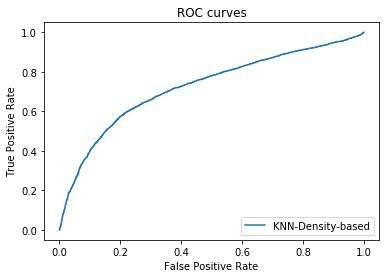

In [43]:
import matplotlib.pyplot as pl
import matplotlib
from skimage import io

fpr,tpr,thresh = sklearn.metrics.roc_curve(y,novelty_scores)

f,ax = pl.subplots(1,1)
ax.plot(fpr,tpr,label="KNN-Density-based")
ax.set_xlabel("False Positive Rate")
ax.set_ylabel("True Positive Rate")
ax.set_title("ROC curves")
ax.legend(loc="lower right")
io.show()

In [44]:
f.savefig('KNN-Density_Gabor-GLCM.png')